# Data Analaysis for Character Recognition Tool

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('../data/Github_Output_data.xlsx', sheet_name='Combined_Long')
df.head()

,Show,Time,Video,Character,Computer,Human_J,Human_R,Referee_Human
0,CEG,:01-:15,1.0,Alex,0,0,0,0
1,CEG,:15-:30,1.0,Alex,1,0,0,0
2,CEG,:31-:45,1.0,Alex,0,0,0,0
3,CEG,:46-1:00,1.0,Alex,1,0,0,0
4,CEG,1:01-1:15,1.0,Alex,0,0,0,0


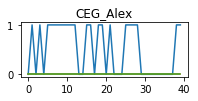

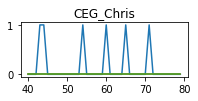

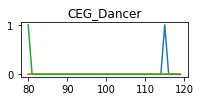

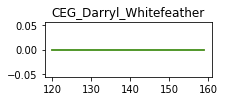

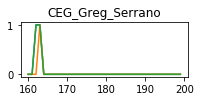

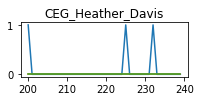

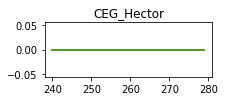

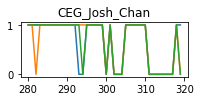

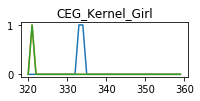

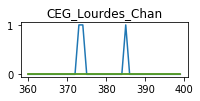

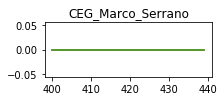

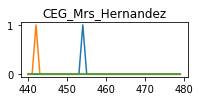

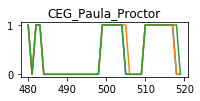

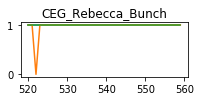

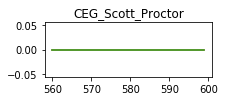

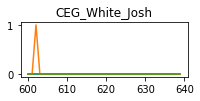

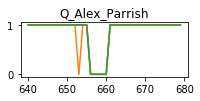

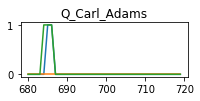

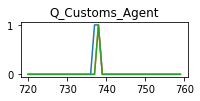

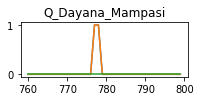

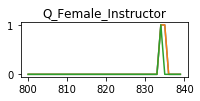

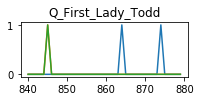

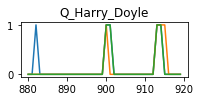

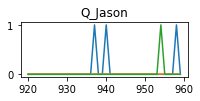

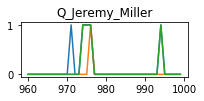

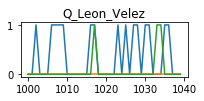

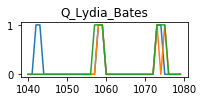

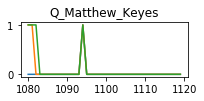

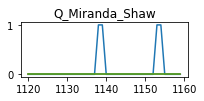

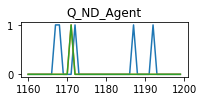

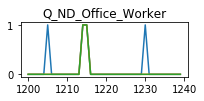

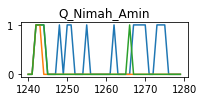

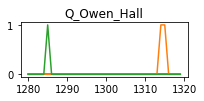

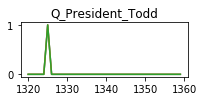

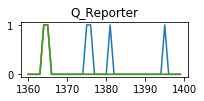

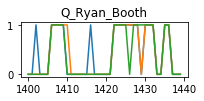

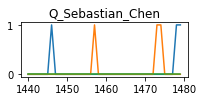

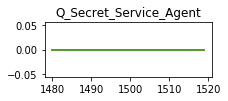

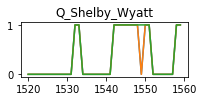

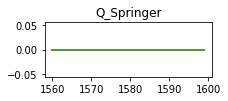

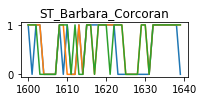

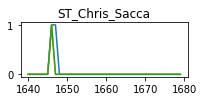

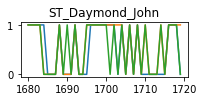

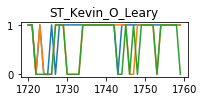

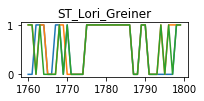

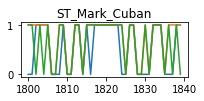

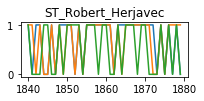

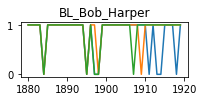

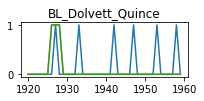

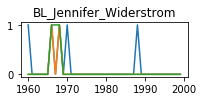

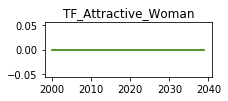

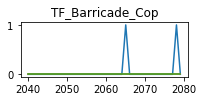

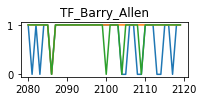

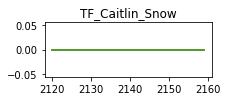

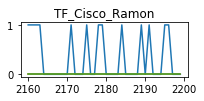

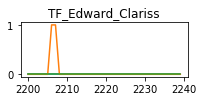

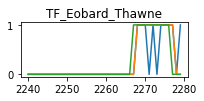

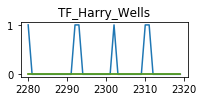

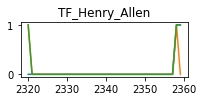

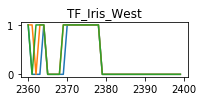

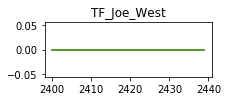

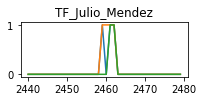

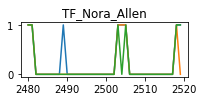

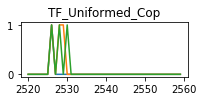

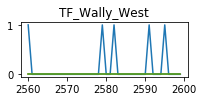

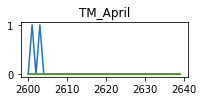

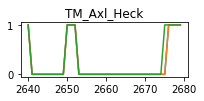

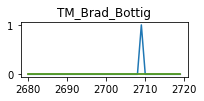

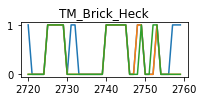

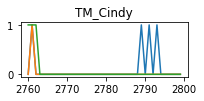

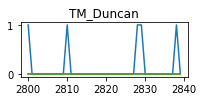

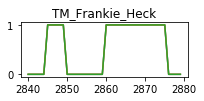

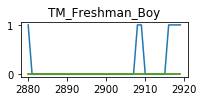

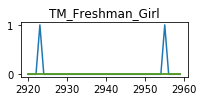

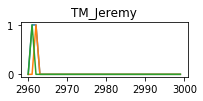

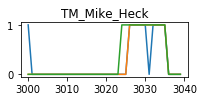

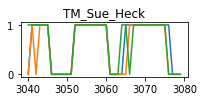

In [6]:
shows = pd.unique(df['Show']).tolist()
shows

for curr_show in range(len(shows)):

    current_show_df = df[df['Show'] == shows[curr_show]]
    characters = pd.unique(current_show_df['Character']).tolist()

    for curr_character in range(len(characters)):

        curr = current_show_df[current_show_df['Character'] == characters[curr_character]]
        plt.figure(figsize = (3,1));
        curr['Computer'].plot();
        curr['Human_J'].plot();
        curr['Human_R'].plot();
        label = shows[curr_show] + '_' + characters[curr_character]
        plt.title(label);
        plt.show()
        plt.close()

In [7]:
y      = df['Computer'].values
y_pred = df['Referee_Human'].values
np.corrcoef(y, y_pred)

array([[1.        , 0.74663697],
       [0.74663697, 1.        ]])

In [8]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_pred, y)
roc_auc = auc(fpr, tpr)
roc_auc

0.8983085906648908

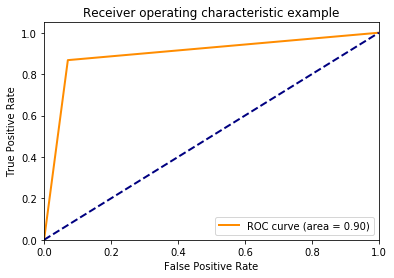

In [9]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()